# Load Libraries

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.decomposition import PCA, FastICA, FactorAnalysis, NMF
from sklearn.preprocessing import StandardScaler
from scipy import stats

## Load Dataframes

In [29]:
# Dataset for modelling from Redshift

df_genre=pd.read_csv('H:/Hub+_Segmentation/DATA/sandbox.genre_consumption_proportions_hubplus_segmentation_AB.csv')

df_subgenre=pd.read_csv('H:/Hub+_Segmentation/DATA/sandbox.subgenre_consumption_proportions_hubplus_segmentation_AB.csv')

df_viewers=pd.read_csv('H:/Hub+_Segmentation/DATA/sandbox.viewers_hubplus_segmentation_AB.csv')

df_programmes=pd.read_csv('H:/Hub+_Segmentation/DATA/sandbox.programme_proportions_hubplus_segmentation_AB.csv')

df_demographics=pd.read_csv('H:/Hub+_Segmentation/DATA/sandbox.viewer_demographics_hubplus_segmentation_AB.csv')

In [103]:
#df_demographics.head()

399298

In [71]:
#df_demographics=df_demographics.drop_duplicates(keep=False)

#  Data wrangling

In [114]:
#df_programmes.head()

,viewer_id,programme_title,programme_proportion_consumption
0,0003e717-b4f8-4136-b56e-05f8a5073578,Love Island: The Reunion,0.0786
1,0003e717-b4f8-4136-b56e-05f8a5073578,Love Island: Australia,0.0861
2,0003e717-b4f8-4136-b56e-05f8a5073578,Love Island,0.8351
3,0003e717-b4f8-4136-b56e-05f8a5073578,NaN,NaN
4,00042b51-b442-4620-ab5b-9193358b3d1c,The Only Way is Essex,0.3110


In [30]:
# Drop rows with NaN sub_genre and subgenre_proportion_consumption
df_subgenre=df_subgenre.dropna(subset=['sub_genre', 'subgenre_proportion_consumption'], how='all')

# Drop rows with NaN genre_id and genre_proportion_consumption
df_genre=df_genre.dropna(subset=['genre_id', 'genre_proportion_consumption'], how='all')

# Drop rows with NaN programme_title and programme_proportion_consumption
df_programmes=df_programmes.dropna(subset=['programme_title', 'programme_proportion_consumption'], how='all')


In [31]:
## Pivot the Genre data

# Remove duplicates
df_genre=df_genre.drop_duplicates(subset=None, keep='first', inplace=False)

# Pivot the programmes to show identicator values of 0 or 1 if they have watched a programme
df_genre2=df_genre.pivot_table(index='viewer_id',columns='genre_id',values= 'genre_proportion_consumption').fillna(0)


In [119]:
#df_genre2.head(10)

genre_id,ARTS,CHILDREN,COMEDY,DRAMA,ENT,FACTUAL,FILM,LIFESTYLE,NEWS,RELIGION,SPORT
viewer_id,,,,,,,,,,,
00001f83-95cb-4370-a1c8-f8c3cd0db845,0.0,0.0,0.0,0.6762,0.2978,0.0168,0.0,0.0,0.0,0.0,0.0
00003f72-36f1-4b01-93a2-30a9ee254030,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.0
000076e0-dc41-432e-aa71-48ccf0d7bfe4,0.0,0.0,0.0,0.0000,1.0000,0.0000,0.0,0.0,0.0,0.0,0.0
00008120-a8c1-4a56-936f-b69d94283556,0.0,0.0,0.0,0.0000,1.0000,0.0000,0.0,0.0,0.0,0.0,0.0
0000df48-056f-47f2-9bb3-970de65985c7,0.0,0.0,0.0,0.0000,1.0000,0.0000,0.0,0.0,0.0,0.0,0.0
00010645-0c19-4a21-8b5f-112ca12b2f22,0.0,0.0,0.0,0.3446,0.5975,0.0577,0.0,0.0,0.0,0.0,0.0
00012967-8390-4f3c-ba8f-f6a0755053a9,0.0,0.0,0.0,0.0450,0.8854,0.0694,0.0,0.0,0.0,0.0,0.0
0001d4c3-0caf-4f99-91a1-ed13589704c5,0.0,0.0,0.0,0.0000,1.0000,0.0000,0.0,0.0,0.0,0.0,0.0
0001eb63-8bab-417d-b3d2-1dc5d8d0c65b,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.0


In [120]:
# Describe data
df_genre2.describe(include = 'all')

genre_id,ARTS,CHILDREN,COMEDY,DRAMA,ENT,FACTUAL,FILM,LIFESTYLE,NEWS,RELIGION,SPORT
count,357036.000000,357036.000000,357036.000000,357036.000000,357036.000000,357036.000000,357036.000000,357036.000000,357036.000000,357036.000000,357036.000000
mean,0.000010,0.002705,0.018243,0.204075,0.703052,0.038135,0.001078,0.002156,0.002403,0.000008,0.025931
std,0.001865,0.040041,0.103028,0.342808,0.390694,0.130588,0.022282,0.028970,0.036532,0.002372,0.145266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.384400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.969400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.303000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.850700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
# Count if anyone watched a genre for more than 50% of their time
df_genre2[df_genre2 > 0.50].count().sort_values(ascending=False)   

genre_id
ENT          255826
DRAMA         70278
SPORT          8381
FACTUAL        6677
COMEDY         4401
CHILDREN        638
NEWS            507
LIFESTYLE       291
FILM            182
RELIGION          2
ARTS              1
dtype: int64

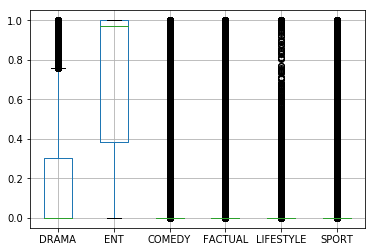

In [122]:
# Show boxplots of the highest means
boxplot = df_genre2.boxplot(column=['DRAMA', 'ENT', 'COMEDY', 'FACTUAL', 'LIFESTYLE', 'SPORT'])

In [233]:
#df_genre2.loc[:,'ENT'].plot.bar(stacked=True, figsize=(10,7))

In [32]:
## Pivot Subgenre data

# Remove duplicates
df_subgenre=df_subgenre.drop_duplicates(subset=None, keep='first', inplace=False)

# Pivot the programmes to show identicator values of 0 or 1 if they have watched a programme
df_subgenre2=df_subgenre.pivot_table(index='viewer_id',columns='sub_genre',values= 'subgenre_proportion_consumption').fillna(0)


In [124]:
df_subgenre2.head()

sub_genre,'MAKING OF' SHOWS,ACTION & ADVENTURE,ACTION AND ADVENTURE,ADULT ANIMATION,ALTERNATIVE COMEDY,ARTS DOCUMENTARY,AWARDS SHOWS,BASED ON A TRUE STORY,BIOGRAPHIES,BOXING,...,TRUE STORY,TV MOVIE,US COMEDY,US DRAMA,VARIETY,WAR,WAR FILM,WESTERN,WILDLIFE AND ENVIRONMENT,WRESTLING
viewer_id,,,,,,,,,,,,,,,,,,,,,
00001f83-95cb-4370-a1c8-f8c3cd0db845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00003f72-36f1-4b01-93a2-30a9ee254030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000076e0-dc41-432e-aa71-48ccf0d7bfe4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00008120-a8c1-4a56-936f-b69d94283556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000df48-056f-47f2-9bb3-970de65985c7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
df_subgenre2.describe(include = 'all')

sub_genre,'MAKING OF' SHOWS,ACTION & ADVENTURE,ACTION AND ADVENTURE,ADULT ANIMATION,ALTERNATIVE COMEDY,ARTS DOCUMENTARY,AWARDS SHOWS,BASED ON A TRUE STORY,BIOGRAPHIES,BOXING,...,TRUE STORY,TV MOVIE,US COMEDY,US DRAMA,VARIETY,WAR,WAR FILM,WESTERN,WILDLIFE AND ENVIRONMENT,WRESTLING
count,357036.000000,357036.000000,357036.000000,357036.000000,357036.000000,357036.000000,357036.000000,357036.000000,357036.000000,357036.000000,...,357036.000000,357036.000000,357036.000000,357036.000000,357036.000000,357036.000000,3.570360e+05,3.570360e+05,357036.000000,357036.000000
mean,0.000029,0.000040,0.000930,0.006298,0.001887,0.000032,0.000573,0.001086,0.000265,0.000357,...,0.000004,0.000484,0.006389,0.000199,0.004909,0.000569,2.453534e-07,9.802933e-09,0.001029,0.000153
std,0.002188,0.002246,0.021809,0.043793,0.016133,0.002815,0.011465,0.015766,0.006663,0.017440,...,0.001011,0.008741,0.044156,0.010508,0.033975,0.009505,1.376654e-04,5.857497e-06,0.025366,0.007363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
max,0.333300,0.333300,1.000000,0.500000,0.500000,0.740200,0.500000,0.500000,1.000000,1.000000,...,0.455600,0.500000,1.000000,1.000000,1.000000,0.500000,8.220000e-02,3.500000e-03,1.000000,0.500000


In [126]:
# Count if anyone watched a genre for more than 20% of their time
df_subgenre2[df_subgenre2 >0.2].count().sort_values(ascending=False).head(20)

sub_genre
FACTUAL ENTERTAINMENT    251930
DATING SHOWS             222685
LONG-RUNNING DRAMA        45119
CRIME AND THRILLERS       33021
REAL LIVES                24126
TALENT SHOWS              11904
SCRIPTED FACTUAL           9945
CELEBRITIES                8450
PERIOD AND HISTORICAL      8206
SPORTS EVENT               7411
FAMILY ENTERTAINMENT       4194
US COMEDY                  3973
CYCLING                    3937
ADULT ANIMATION            3930
QUIZ AND GAME SHOWS        3838
FOOTBALL                   3690
CONTEMPORARY BRITISH       3676
DOCUMENTARY                3101
VARIETY                    2745
CHAT AND MAGAZINE          2742
dtype: int64

In [127]:
# Count if anyone watched a genre for more than 5% of their time
df_subgenre2[df_subgenre2 >0.05].count().sort_values(ascending=False).head(5)

sub_genre
FACTUAL ENTERTAINMENT    274623
DATING SHOWS             245784
REAL LIVES                73096
LONG-RUNNING DRAMA        60802
CRIME AND THRILLERS       56864
dtype: int64

In [128]:
# Count if anyone watched a genre for more than 5% of their time
df_subgenre2[df_subgenre2 >0.9].count().sort_values(ascending=False).head(5)

sub_genre
LONG-RUNNING DRAMA       11800
CRIME AND THRILLERS       7139
TALENT SHOWS              2323
PERIOD AND HISTORICAL     1502
FOOTBALL                   828
dtype: int64

In [129]:
df_programmes.head()

,viewer_id,programme_title,programme_proportion_consumption
0,0003e717-b4f8-4136-b56e-05f8a5073578,Love Island: The Reunion,0.0786
1,0003e717-b4f8-4136-b56e-05f8a5073578,Love Island: Australia,0.0861
2,0003e717-b4f8-4136-b56e-05f8a5073578,Love Island,0.8351
4,00042b51-b442-4620-ab5b-9193358b3d1c,The Only Way is Essex,0.3110
5,00042b51-b442-4620-ab5b-9193358b3d1c,The X Factor,0.1624


In [34]:
import gc
gc.collect()
del df_genre
del df_subgenre
del boxplot

NameError: name 'boxplot' is not defined

In [33]:
## Pivot Programme data

# Remove duplicates
df_programmes=df_programmes.drop_duplicates(subset=None, keep='first', inplace=False)

# Pivot the programmes to show identicator values of 0 or 1 if they have watched a programme
df_programmes2=df_programmes.pivot_table(index='viewer_id',columns='programme_title',values= 'programme_proportion_consumption').fillna(0)

In [ ]:
df_programmes2.describe(include = 'all')

In [23]:
# Count if anyone watched a genre for more than 5% of their time
df_programmes2[df_programmes2 >0.05].count().sort_values(ascending=False).head(10)

programme_title
Love Island                        204395
Coronation Street                   56717
The Only Way is Essex               36331
Emmerdale                           36082
The X Factor                        28069
Unforgotten                         26766
Love Island: Aftersun               25955
Love Island: Australia              22440
Love Island: The Reunion            20034
The Real Housewives of Cheshire     17659
dtype: int64

In [244]:
# Count if anyone watched a genre for more than 20% of their time
df_programmes2[df_programmes2 >0.20].count().sort_values(ascending=False).head(10)

programme_title
Love Island                        185898
Coronation Street                   42846
Emmerdale                           25869
The Only Way is Essex               17028
Love Island: Australia              15158
Unforgotten                         13787
The X Factor                        12965
Love Island: The Reunion             6719
The Real Housewives of Cheshire      6676
The Jeremy Kyle Show                 6035
dtype: int64

In [24]:
# Count if anyone watched a genre for more than 50% of their time
df_programmes2[df_programmes2 >0.50].count().sort_values(ascending=False).head(10)

programme_title
Love Island                               153271
Coronation Street                          17686
Emmerdale                                   8488
Love Island: Australia                      7555
The Only Way is Essex                       6217
Unforgotten                                 5952
The X Factor                                5516
Love Island: The Reunion                    2885
The Jeremy Kyle Show                        2574
I'm a Celebrity... Get Me Out of Here!      2381
dtype: int64

In [25]:
# Count if anyone watched a genre for more than 90% of their time
df_programmes2[df_programmes2 >0.9].count().sort_values(ascending=False).head(10)

programme_title
Love Island                               95437
Coronation Street                          6235
The Only Way is Essex                      2903
Emmerdale                                  2772
The X Factor                               2733
Unforgotten                                2669
Love Island: Australia                     2517
Love Island: The Reunion                   1882
I'm a Celebrity... Get Me Out of Here!     1397
Tour de France                             1369
dtype: int64

# Missing data check

In [9]:
# Check how much missing data
df_programmes2.isnull().values.any()

False

In [10]:
# Check how much missing data
df_genre2.isnull().values.any()

False

In [11]:
# Check how much missing data
df_subgenre2.isnull().values.any()

False

In [12]:
# Check how much missing data
df_demographics.isna().sum()

viewer_id                    0
age                      33926
gender                    1833
abc1_flag                    0
h_lifestage             260358
pc_mosaic_uk_6_type     260358
pc_mosaic_uk_6_group    260358
dtype: int64

In [35]:
# Replace age value with average age of HUB  which is 38 (16 -100)
df_demographics['age']=df_demographics['age'].replace(np.nan, 38)

# Replace missing genders with female
df_demographics['gender']=df_demographics['gender'].replace(np.nan, 'F')

In [14]:
len(df_demographics)

399298

In [15]:
# Not going to use experian as more than half are missing
df_demographics.isna().sum()

viewer_id                    0
age                          0
gender                       0
abc1_flag                    0
h_lifestage             260358
pc_mosaic_uk_6_type     260358
pc_mosaic_uk_6_group    260358
dtype: int64

In [84]:
# Check how much missing data
df_programmes.isna().sum()

viewer_id                              0
programme_title                     1228
programme_proportion_consumption       0
dtype: int64

In [36]:
# Convert to dummy variables
df_demographics_dummies=pd.concat([df_demographics, pd.get_dummies(df_demographics['gender']).astype('int32'),
                                    pd.get_dummies(df_demographics['abc1_flag']).astype('int32')],axis=1)
                                    ##pd.get_dummies(df_demographics['h_lifestage']).astype('int32'),
                                    ##pd.get_dummies(df_demographics['pc_mosaic_uk_6_type']).astype('int32'),
                                    ##pd.get_dummies(df_demographics['pc_mosaic_uk_6_group']).astype('int32')],axis=1)

In [17]:
df_demographics_dummies.head()

,viewer_id,age,gender,abc1_flag,h_lifestage,pc_mosaic_uk_6_type,pc_mosaic_uk_6_group,F,M,X,0,1
0,003e0f29-4fef-46bb-a8dc-0457f9743e6f,42.0,M,0,NaN,NaN,NaN,0,1,0,1,0
1,00adf963-3d8f-43c0-965b-d5f17e0d9c3f,82.0,F,1,NaN,NaN,NaN,1,0,0,0,1
2,00e7da45-ad09-4b2a-965d-fc2ef308dda6,36.0,M,0,NaN,NaN,NaN,0,1,0,1,0
3,013a72f7-bdcf-46a8-865e-80fd9bfd64f4,55.0,F,1,NaN,NaN,NaN,1,0,0,0,1
4,01753841-4808-489a-965a-e23c2939b1c2,32.0,F,1,05,62.0,O,1,0,0,0,1


In [37]:
#df_demographics.groupby('age').count()
df_demographics_dummies=df_demographics_dummies.drop(['gender', 'abc1_flag','h_lifestage', 'pc_mosaic_uk_6_type', 'pc_mosaic_uk_6_group'],axis=1)

In [250]:
# Rename columns

#df_demographics_dummies=df_demographics_dummies.rename(columns = {'0':'c2de_FLAG'})
#df_demographics_dummies=df_demographics_dummies.rename(columns = {'1':'abc1_FLAG'})

In [88]:
df_demographics_dummies.columns

Index([           'viewer_id',                  'age',               'gender',
                  'abc1_flag',          'h_lifestage',  'pc_mosaic_uk_6_type',
       'pc_mosaic_uk_6_group',                    'F',                    'M',
                          'X',                      0],
      dtype='object')

In [252]:
# Biggest age for Hub+ is 23
df_demographics_dummies[['viewer_id','age']].groupby('age').count().head(60)

,viewer_id
age,
16.0,2478
17.0,10883
18.0,29886
19.0,40084
20.0,50221
21.0,55268
22.0,58644
23.0,62431
24.0,50430


In [255]:
print('Median:') 
print(df_demographics_dummies[['age']].median())
print('Mean:') 
print(df_demographics_dummies[['age']].mean())

Median:
age    37.0
dtype: float64
Mean:
age    40.539392
dtype: float64


In [256]:
df_demographics_dummies.head()

,viewer_id,age,gender,abc1_flag,h_lifestage,pc_mosaic_uk_6_type,pc_mosaic_uk_6_group,F,M,X,...,F,G,H,I,J,K,L,M,N,O
0,00104551-6dba-4333-9857-3f776836636c,64.0,M,1,09,24.0,F,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,00104551-6dba-4333-9857-3f776836636c,64.0,M,1,09,24.0,F,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,00104551-6dba-4333-9857-3f776836636c,64.0,M,1,09,24.0,F,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,00104551-6dba-4333-9857-3f776836636c,64.0,M,1,09,24.0,F,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,00104551-6dba-4333-9857-3f776836636c,64.0,M,1,09,24.0,F,0,1,0,...,1,0,0,0,0,0,0,0,0,0


# Bivariate EDA

In [ ]:
# Age by subgenres

In [96]:
len(df_programmes2)

333987

In [20]:
del df_demographics_dummies
del df_genre2
del df_subgenre2
del df_programmes2

In [38]:
# Join viewer data and demographics
from functools import reduce

df_demo_genre = reduce(lambda left,right: pd.merge(left,right,on='viewer_id'), 
                  [df_demographics_dummies,
                   df_genre2, 
                   df_subgenre2,
                   df_programmes2])

In [41]:
list(df_demo_genre.columns)

['viewer_id',
 'age',
 'F',
 'M',
 'X',
 0,
 1,
 'ARTS',
 'CHILDREN',
 'COMEDY_x',
 'DRAMA_x',
 'ENT',
 'FACTUAL',
 'FILM',
 'LIFESTYLE',
 'NEWS_x',
 'RELIGION',
 'SPORT_x',
 "'MAKING OF' SHOWS",
 'ACTION & ADVENTURE',
 'ACTION AND ADVENTURE',
 'ADULT ANIMATION',
 'ALTERNATIVE COMEDY',
 'ARTS DOCUMENTARY',
 'AWARDS SHOWS',
 'BASED ON A TRUE STORY',
 'BIOGRAPHIES',
 'BOXING',
 'BUSINESS AND CONSUMER',
 'CELEBRITIES',
 'CELEBRITY',
 'CHAT AND MAGAZINE',
 "CHILDREN'S ACTION AND ADVENTURE",
 "CHILDREN'S ANIMATION",
 "CHILDREN'S COMEDY",
 "CHILDREN'S DRAMA",
 "CHILDREN'S ENTERTAINMENT",
 "CHILDREN'S FACTUAL",
 "CHILDREN'S FILM",
 "CHILDREN'S QUIZ AND GAME SHOWS",
 "CHILDREN'S SCIENCE FICTION AND FANTASY",
 'CLASSIC COMEDY',
 'CLIP SHOWS',
 'COMEDY_y',
 'COMEDY DRAMA',
 'CONTEMPORARY BRITISH',
 'CRIME AND THRILLER',
 'CRIME AND THRILLERS',
 'CRIME DOCUMENTARY',
 'CURRENT AFFAIRS',
 'CYCLING',
 'DARTS',
 'DATING SHOWS',
 'DOCUMENTARY',
 'DRAMA_y',
 'DRAMA DOCUMENTARY',
 'FACTUAL ENTERTAINMENT

(0, 110)

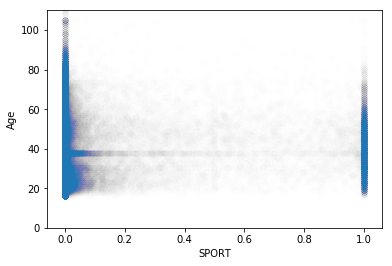

In [42]:
plt.scatter(df_demo_genre['SPORT_x'],(df_demo_genre['age']),alpha=0.003)
plt.xlabel("SPORT")
plt.ylabel("Age")
plt.ylim((0,110))

(0, 110)

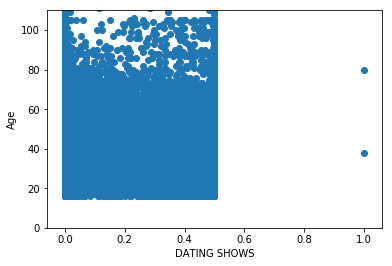

In [56]:
plt.scatter(df_demo_genre['DATING SHOWS'],(df_demo_genre['age']))
plt.xlabel("DATING SHOWS")
plt.ylabel("Age")
plt.ylim((0,110))

(0, 110)

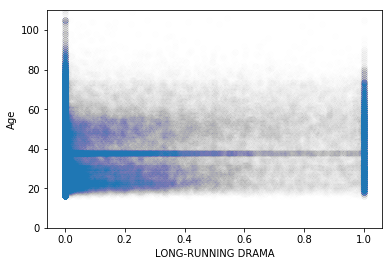

In [59]:
plt.scatter(df_demo_genre['LONG-RUNNING DRAMA'],(df_demo_genre['age']),alpha=0.002)
plt.xlabel("LONG-RUNNING DRAMA")
plt.ylabel("Age")
plt.ylim((0,110))

(0, 110)

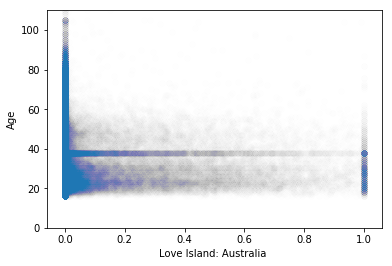

In [45]:
plt.scatter(df_demo_genre['Love Island: Australia'],(df_demo_genre['age']),alpha=0.002)
plt.xlabel("Love Island: Australia ")
plt.ylabel("Age")
plt.ylim((0,110))

(0, 110)

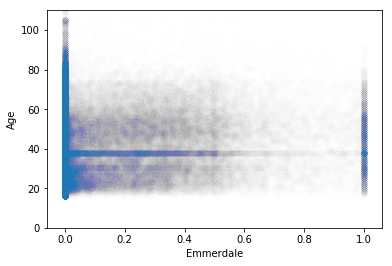

In [46]:
# Emmerdale is showing some people only watch 100% emmerdale or some people watch it less than 50% as their viewing
# Hence they watch Emmerdale in combination with other programmes.
plt.scatter(df_demo_genre['Emmerdale'],(df_demo_genre['age']),alpha=0.002)
plt.xlabel("Emmerdale")
plt.ylabel("Age")
plt.ylim((0,110))

(0, 110)

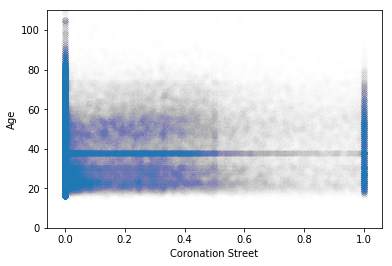

In [51]:
plt.scatter(df_demo_genre['Coronation Street'],(df_demo_genre['age']),alpha=0.002)
plt.xlabel("Coronation Street")
plt.ylabel("Age")
plt.ylim((0,110))

(0, 110)

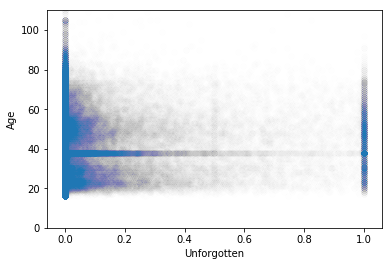

In [47]:
# Some people sign up for just Unforgotten, but then majoirt watch a combination of programmes
plt.scatter(df_demo_genre['Unforgotten'],(df_demo_genre['age']),alpha=0.002)
plt.xlabel("Unforgotten")
plt.ylabel("Age")
plt.ylim((0,110))

In [260]:
df_demographics.head()

,viewer_id,age,gender,abc1_flag,h_lifestage,pc_mosaic_uk_6_type,pc_mosaic_uk_6_group
0,00104551-6dba-4333-9857-3f776836636c,64.0,M,1,09,24.0,F
1,00104551-6dba-4333-9857-3f776836636c,64.0,M,1,09,24.0,F
2,00104551-6dba-4333-9857-3f776836636c,64.0,M,1,09,24.0,F
3,00104551-6dba-4333-9857-3f776836636c,64.0,M,1,09,24.0,F
4,00104551-6dba-4333-9857-3f776836636c,64.0,M,1,09,24.0,F
